In [15]:
# =====================================
# Title: Anomaly Detection using Autoencoder on ECG Dataset
# =====================================

# a. Import Required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# =====================================
# b. Upload / Access the Dataset
# =====================================

# Load the ECG dataset
path = r"C:\Users\\OneDrive\Desktop\DL\DLDataset\ecgAssn4.csv"
df = pd.read_csv(path, header=None)

# Display basic information
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (4998, 141)
        0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138

In [16]:

# Separate signal features and label (last column is label)
X = df.iloc[:, :-1]   # all ECG signal features
y = df.iloc[:, -1]    # last column (label - 0 or 1)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (80%-20%)
x_train, x_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)


Training shape: (3998, 140)
Testing shape: (1000, 140)


In [17]:
# =====================================
# c. Encoder converts input to latent representation
# =====================================

encoder = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),  # input shape based on ECG features
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu')       # latent space representation
])

# =====================================
# d. Decoder reconstructs input from latent representation
# =====================================

decoder = models.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')  # same as input size
])

# Combine Encoder + Decoder into Autoencoder
autoencoder = models.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)            │ (None, 16)                  │          28,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_10 (Sequential)           │ (None, 140)                 │          29,036 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,948 (226.36 KB)

 Trainable params: 57,948 (226.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
63/63 - 7s - 109ms/step - loss: 0.6371 - mae: 0.5606 - val_loss: 0.3542 - val_mae: 0.4014
Epoch 2/20
63/63 - 1s - 10ms/step - loss: 0.3068 - mae: 0.3638 - val_loss: 0.2502 - val_mae: 0.3260
Epoch 3/20
63/63 - 1s - 10ms/step - loss: 0.2224 - mae: 0.3043 - val_loss: 0.1982 - val_mae: 0.2897
Epoch 4/20
63/63 - 1s - 10ms/step - loss: 0.1824 - mae: 0.2767 - val_loss: 0.1690 - val_mae: 0.2641
Epoch 5/20
63/63 - 1s - 10ms/step - loss: 0.1587 - mae: 0.2576 - val_loss: 0.1571 - val_mae: 0.2563
Epoch 6/20
63/63 - 1s - 11ms/step - loss: 0.1471 - mae: 0.2489 - val_loss: 0.1442 - val_mae: 0.2451
Epoch 7/20
63/63 - 1s - 11ms/step - loss: 0.1354 - mae: 0.2374 - val_loss: 0.1354 - val_mae: 0.2355
Epoch 8/20
63/63 - 1s - 10ms/step - loss: 0.1282 - mae: 0.2312 - val_loss: 0.1265 - val_mae: 0.2255
Epoch 9/20
63/63 - 1s - 11ms/step - loss: 0.1201 - mae: 0.2226 - val_loss: 0.1201 - val_mae: 0.2213
Epoch 10/20
63/63 - 1s - 10ms/step - loss: 0.1185 - mae: 0.2226 - val_loss: 0.1149 - val_mae: 0.216

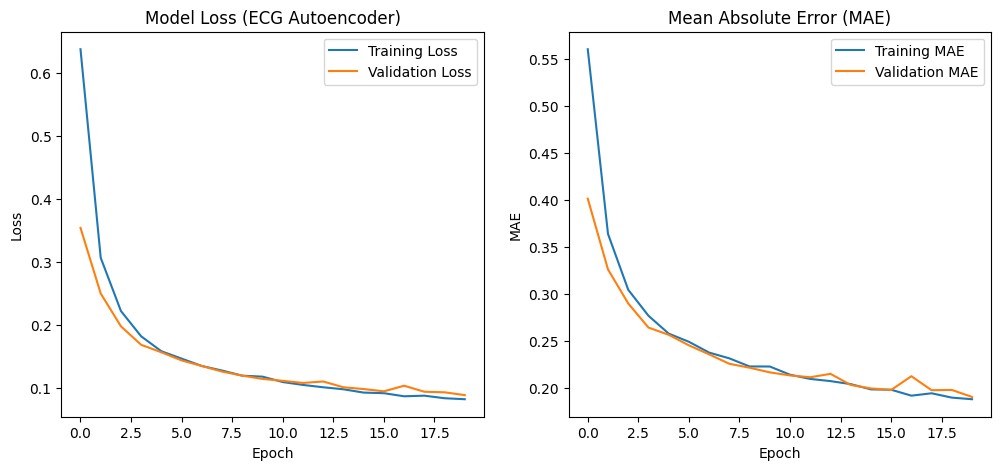

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Reconstruction Error Threshold: 0.223330
Number of anomalies detected: 50


In [18]:
# =====================================
# e. Compile the Model
# =====================================

autoencoder.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)


# =====================================
# f. Train the Model
# =====================================

history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, x_test),
    shuffle=True,
    verbose=2
)


# =====================================
# g. Plot Training Curves
# =====================================

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss (ECG Autoencoder)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title("Mean Absolute Error (MAE)")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.show()


# =====================================
# h. Detecting Anomalies
# =====================================

# Reconstruct test data
reconstructed = autoencoder.predict(x_test)

# Compute reconstruction error (MSE)
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)

# Set threshold for anomaly detection (95th percentile)
threshold = np.percentile(mse, 95)
print(f"\nReconstruction Error Threshold: {threshold:.6f}")

# Detect anomalies
anomalies = mse > threshold
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")


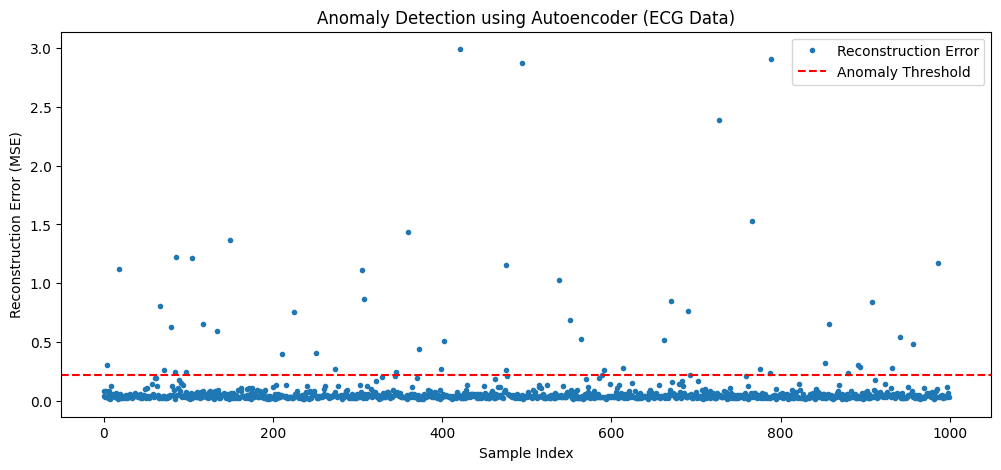

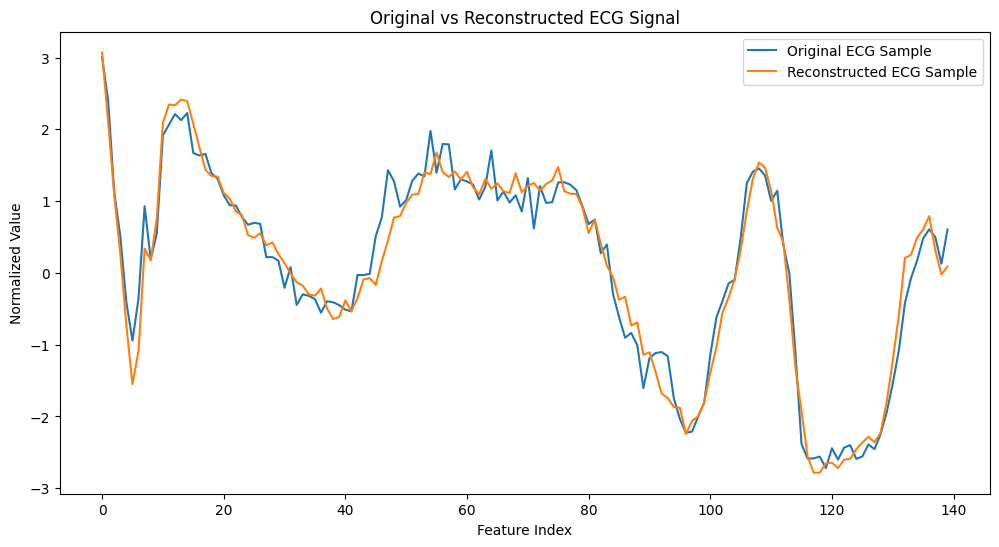

In [19]:
# =====================================
# i. Visualize Reconstruction Errors
# =====================================

plt.figure(figsize=(12, 5))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='Reconstruction Error')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title("Anomaly Detection using Autoencoder (ECG Data)")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error (MSE)")
plt.legend()
plt.show()


# =====================================
# j. Example Comparison (Original vs Reconstructed)
# =====================================

plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original ECG Sample')
plt.plot(reconstructed[0], label='Reconstructed ECG Sample')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Value')
plt.title('Original vs Reconstructed ECG Signal')
plt.legend()
plt.show()